In [18]:
import time
import json
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [124]:
data = pd.read_csv('../data/income_evaluation.csv')

In [125]:
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [126]:
print(data.columns)

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')


In [127]:
for col in data.columns:
    print(data[col].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[ 77516  83311 215646 ...  34066  84661 257302]
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Pr

In [128]:
data.replace([' Husband', ' Wife'],' Partner', inplace=True)
data.replace([' Cuba', ' Jamaica', ' India', ' ?', ' Mexico', ' South',
 ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany', ' Iran',
 ' Philippines', ' Italy', ' Poland', ' Columbia', ' Cambodia', ' Thailand',
 ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
 ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan', ' Yugoslavia',
 ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
 ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland', ' Hungary',
 ' Holand-Netherlands'], ' Foreign', inplace=True)
data.drop(' fnlwgt', axis=1, inplace=True)

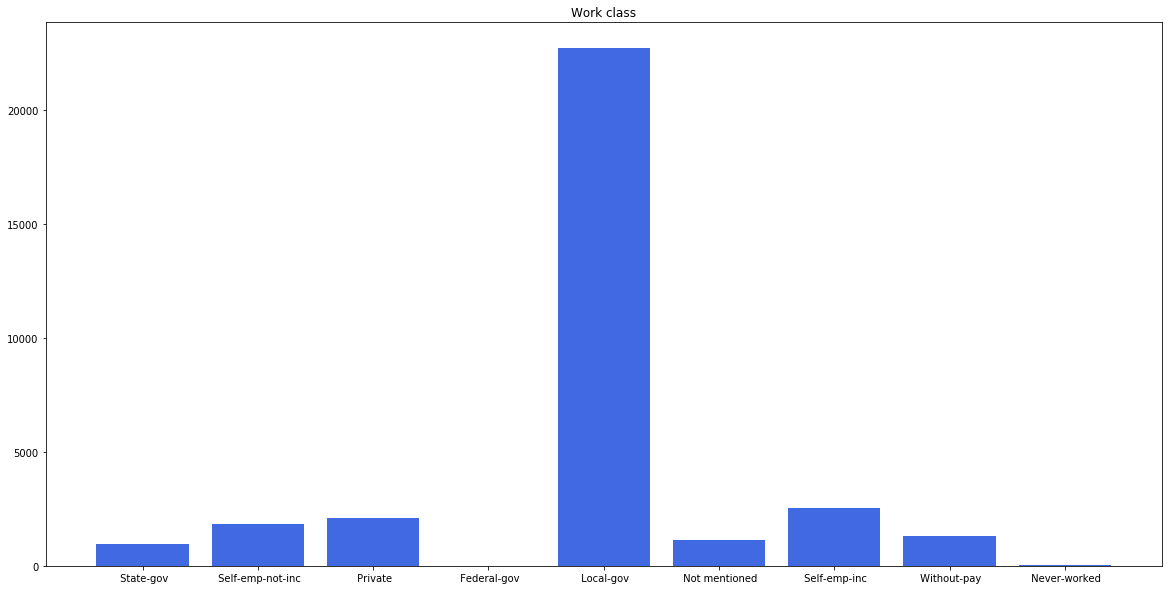

In [129]:
workclass = [' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',' Local-gov',
         ' Not mentioned', ' Self-emp-inc', ' Without-pay', ' Never-worked']

dico = {}
for i, name in enumerate(workclass):
    dico[name] = data.groupby(' workclass').count()[' sex'][i]

plt.figure(figsize=(20,10))
figure=plt.bar(dico.keys(),dico.values(),color='royalblue')
plt.title('Work class')
plt.show()

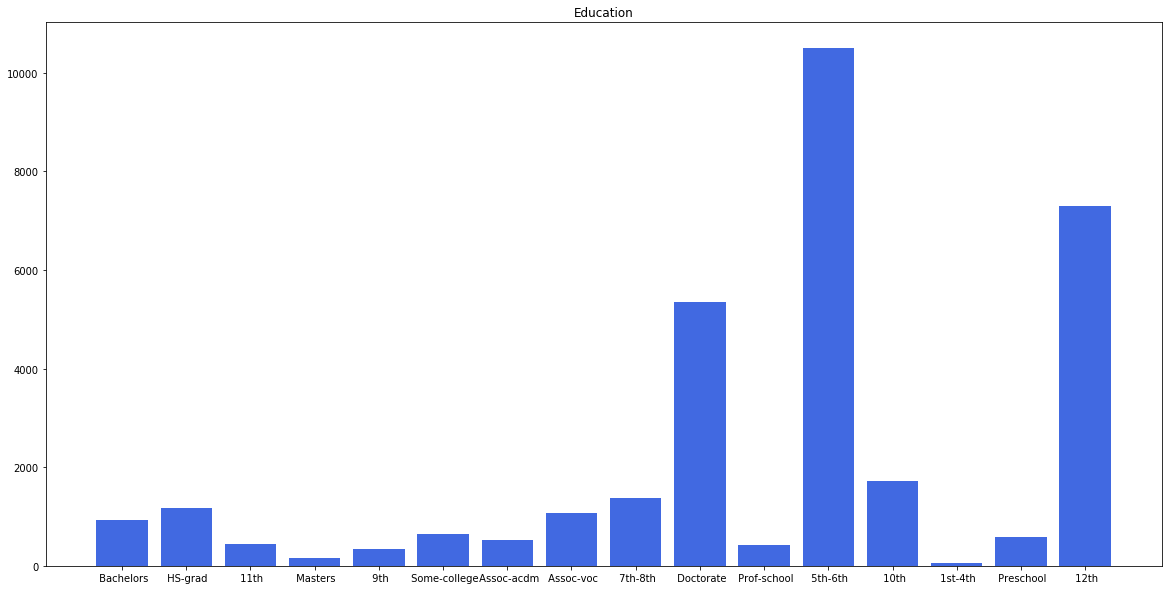

In [130]:
education = [' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college',
             ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school',
             ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th']

dico_edu = {}
for i, name in enumerate(education):
    dico_edu[name] = data.groupby(' education').count()[' sex'][i]

plt.figure(figsize=(20,10))
figure=plt.bar(dico_edu.keys(),dico_edu.values(),color='royalblue')
plt.title('Education')
plt.show()

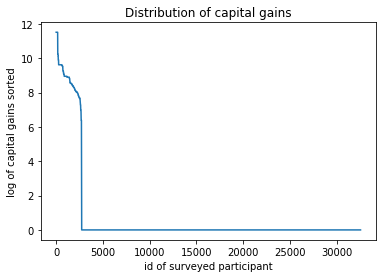

In [131]:
plt.plot(range(len(data[' capital-gain'])),np.log(data[' capital-gain'].sort_values(ascending=False)+1))
plt.ylabel('log of capital gains sorted')
plt.xlabel('id of surveyed participant')
plt.title('Distribution of capital gains')
plt.show()

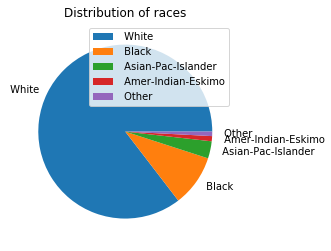

In [132]:
races = data[' race'].unique()
R = {}
for rac in races:
    R[rac] = 0
for rac in data[' race']:
    R[rac] +=1

plt.pie(R.values(), labels=R.keys())
plt.legend()
plt.title('Distribution of races')
plt.show()

In [133]:
from sklearn.preprocessing import StandardScaler
nums = data.drop([' workclass', ' education', ' marital-status', ' occupation', ' relationship',
                 ' race', ' sex', ' native-country', ' income'], axis=1)
cols = nums.columns
scaler = StandardScaler()
nums = scaler.fit_transform(nums)
nums = pd.DataFrame(nums, columns=cols)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [134]:
data.drop(['age',' education-num', ' capital-gain', ' capital-loss', ' hours-per-week'], axis=1,inplace=True)

def make_int(col):
    global data
    replacement = data[col]
    data.drop([col], axis=1, inplace=True)
    replacement = replacement.replace(replacement.unique(), list(range(len(replacement.unique()))))
    data[col] = replacement
    replacement = pd.get_dummies(data[col], prefix=col)
    data.drop([col], axis=1, inplace=True)
    data = pd.concat([data, replacement], axis=1)


for col in data.columns:
    make_int(col)

data = pd.concat([data, nums], axis=1)

0.33079450876815825


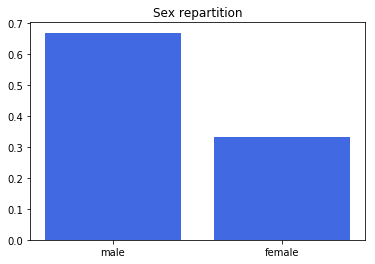

In [135]:
female = data[' sex_1'].sum()
total = len(data[' sex_1'])
fem_prop = female/total
print(fem_prop)
dico_graphe={'male':1-fem_prop,'female':fem_prop}
figure=plt.bar(dico_graphe.keys(),dico_graphe.values(),color='royalblue')
plt.title('Sex repartition')
plt.show()

[]

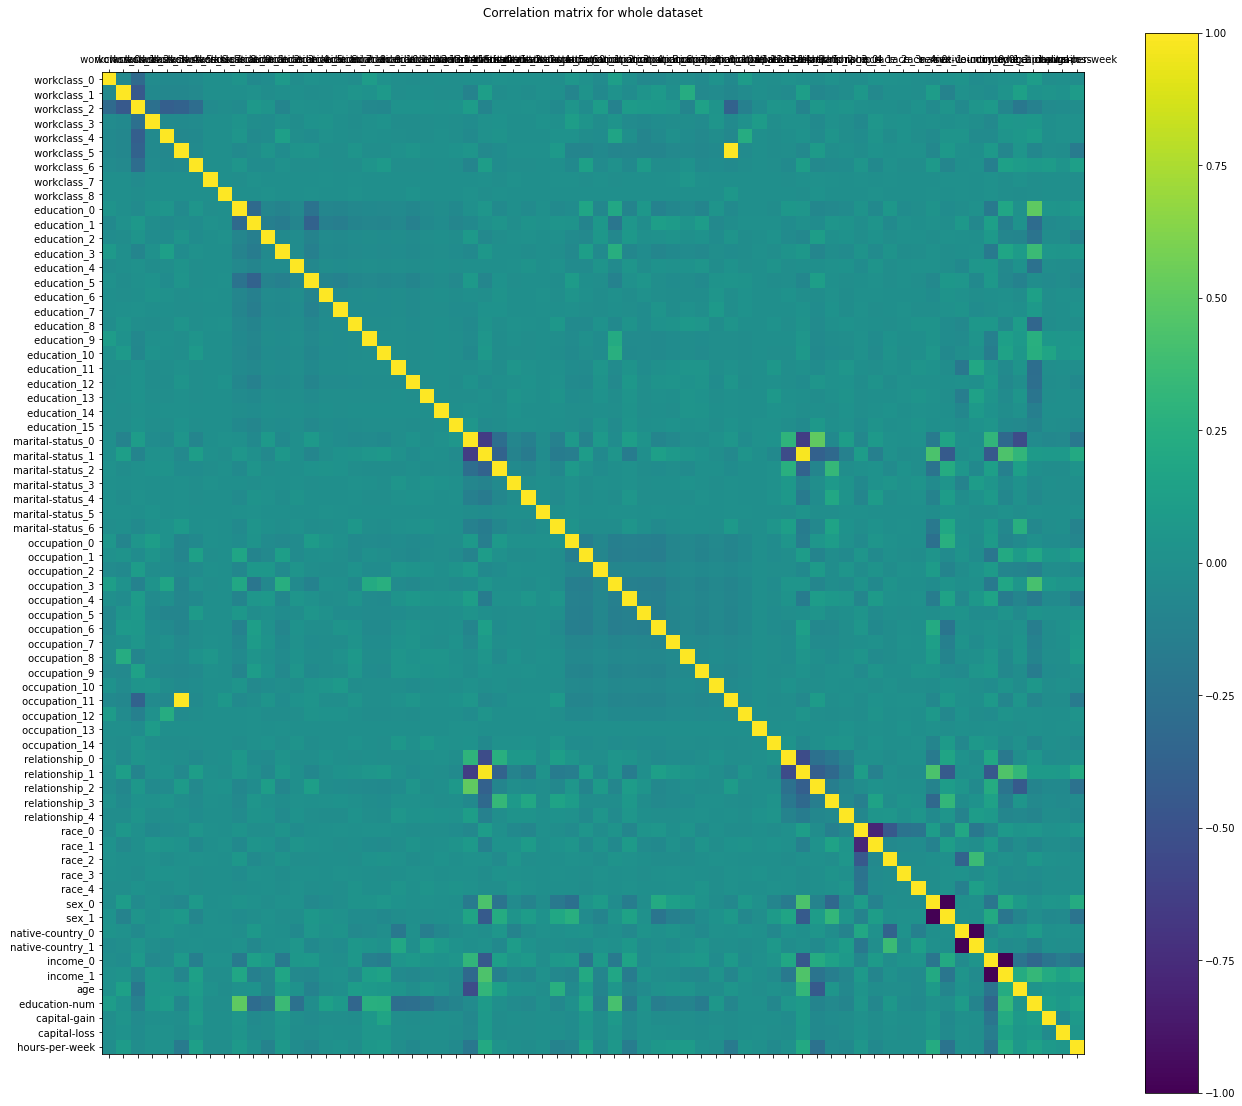

In [159]:
corr = data.corr()
plt.matshow(corr)
groups = data.columns
x_pos = np.arange(len(groups))
plt.xticks(x_pos,groups) #
y_pos = np.arange(len(groups))
plt.yticks(y_pos,groups) #
fig = plt.gcf()
fig.set_size_inches(22, 19)
plt.colorbar()
plt.title('Correlation matrix for whole dataset')
plt.plot()

In [137]:
data.head(5)

,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,education_0,...,sex_1,native-country_0,native-country_1,income_0,income_1,age,education-num,capital-gain,capital-loss,hours-per-week
0,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0.030671,1.134739,0.148453,-0.21666,-0.035429
1,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0.837109,1.134739,-0.145920,-0.21666,-2.222153
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,-0.042642,-0.420060,-0.145920,-0.21666,-0.035429
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1.057047,-1.197459,-0.145920,-0.21666,-0.035429
4,0,0,1,0,0,0,0,0,0,1,...,1,0,1,1,0,-0.775768,1.134739,-0.145920,-0.21666,-0.035429


In [139]:
X = data.drop([' sex_0', ' sex_1'], axis=1)
y = data[' sex_1']

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [140]:
COMPUTE_BEST_FOREST = False

if COMPUTE_BEST_FOREST:
    n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 10)]
    max_features = ['auto', 'sqrt']
    max_depth = [int(x) for x in np.linspace(5, 100, num = 10)]
    max_depth.append(None)
    bootstrap = [True, False]
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'bootstrap': bootstrap}
    pprint(random_grid)

    forest = RandomForestClassifier()

    #Initialisation du RandomizedSearchCV
    CV_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 50, cv = 3)
    CV_random.fit(X_train, y_train)

    forest_best = CV_random.best_params_
    with open('../data/forest_params.json', 'w') as outfile:
        json.dump(forest_best, outfile)

In [141]:
with open('../data/forest_params.json') as f:
    forest_best = json.load(f)

pprint(forest_best)

scores = {}

{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'n_estimators': 566}


0.8798991519596607
0.7967615857063093


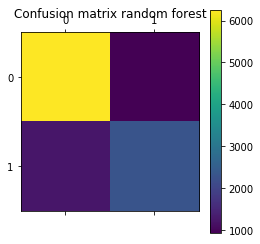

In [142]:
boot = forest_best['bootstrap']
depth = forest_best['max_depth']
features = forest_best['max_features']
estimators = forest_best['n_estimators']

best_forest = RandomForestClassifier(bootstrap=boot,max_depth=depth,max_features=features,n_estimators=estimators)
best_forest.fit(X_train,y_train)

print(best_forest.score(X_train, y_train))
print(best_forest.score(X_test, y_test))

scores['forest'] = best_forest.score(X_test, y_test)

conf_forest = confusion_matrix(y_test, best_forest.predict(X_test))

plt.matshow(conf_forest);
plt.title('Confusion matrix random forest')
plt.colorbar()
plt.show()

0.8755217956613974
0.8478569791427917
0.784105713753955


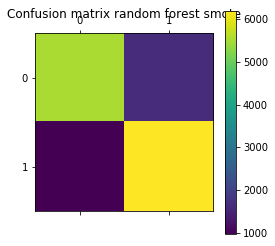

In [143]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)
X_test_smote, y_test_smote = sm.fit_sample(X_test, y_test)

best_forest.fit(X_train_smote, y_train_smote)

print(best_forest.score(X_train_smote, y_train_smote))
print(best_forest.score(X_train, y_train))
print(best_forest.score(X_test, y_test))

scores['forest_smote'] = best_forest.score(X_test, y_test)

conf_forest_smote = confusion_matrix(y_test_smote, best_forest.predict(X_test_smote))

plt.matshow(conf_forest_smote);
plt.title('Confusion matrix random forest smote')
plt.colorbar()
plt.show()

0.7994593854786833
0.787393994957598
0.7773124883677648


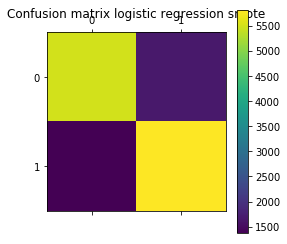

In [144]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(solver="newton-cg").fit(X_train_smote, y_train_smote, )

print(logit.score(X_train_smote, y_train_smote))
print(logit.score(X_train, y_train))
print(logit.score(X_test, y_test))

scores['logit'] = logit.score(X_test, y_test)

conf_logit = confusion_matrix(y_test_smote, logit.predict(X_test_smote))

plt.matshow(conf_logit);
plt.colorbar()
plt.title('Confusion matrix logistic regression smote')
plt.show()

0.8330596044617806
0.812560165024066
0.7743346361436814


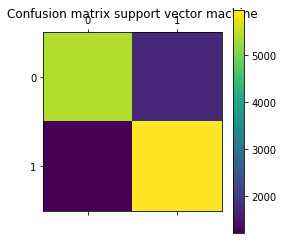

In [145]:
from sklearn.svm import SVC
svc = SVC(gamma='auto').fit(X_train_smote, y_train_smote)
print(svc.score(X_train_smote, y_train_smote))
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

scores['svm'] = svc.score(X_test, y_test)

conf_svc = confusion_matrix(y_test_smote, svc.predict(X_test_smote))

plt.matshow(conf_svc);
plt.colorbar()
plt.title('Confusion matrix support vector machine')
plt.show()

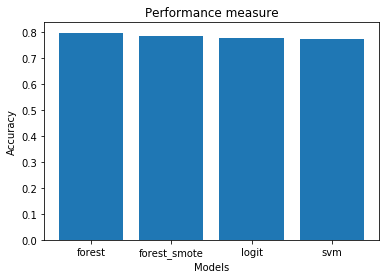

In [146]:
plt.bar(scores.keys(), scores.values())
plt.title('Performance measure')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [149]:
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

Using TensorFlow backend.


In [150]:
model = Sequential()
model.add(Dense(64, input_shape=(66,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.00005, amsgrad=True)

model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=20, verbose=0,
                   mode='auto', baseline=None, restore_best_weights=False)

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                4288      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_3 (Dropout)  

In [151]:
model.fit(X_train_smote, y_train_smote, batch_size=16, epochs=200, 
          validation_data=(X_test, y_test), callbacks=[es], verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 29226 samples, validate on 10746 samples
Epoch 1/200
29226/29226 [==============================] - 4s 147us/step - loss: 0.5947 - acc: 0.6964 - val_loss: 0.4638 - val_acc: 0.7744
Epoch 2/200
29226/29226 [==============================] - 3s 117us/step - loss: 0.5087 - acc: 0.7726 - val_loss: 0.4489 - val_acc: 0.7764
Epoch 3/200
29226/29226 [==============================] - 3s 116us/step - loss: 0.4864 - acc: 0.7866 - val_loss: 0.4511 - val_acc: 0.7740
Epoch 4/200
29226/29226 [==============================] - 3s 115us/step - loss: 0.4761 - acc: 0.7910 - val_loss: 0.4429 - val_acc: 0.7764
Epoch 5/200
29226/29226 [==============================] - 3s 117us/step - loss: 0.4740 - acc: 0.7969 - val_loss: 0.4491 - val_acc: 0.7768
Epoch 6/200
29226/29226 [==============================] - 3s 117us/step - loss: 0.4708 - acc: 0.7974 - val_loss: 0.4457 - val_acc: 0.7765
Epoch 7/200
29226/29226 [==============================] - 4s 122us/

In [156]:
_, acc = model.evaluate(X_train, y_train,
                            batch_size=2048, verbose=0)

print('Train accuracy:', acc,'\n')

_, acc = model.evaluate(X_test, y_test,
                            batch_size=2048, verbose=0)

print('Test accuracy:', acc)

Train accuracy: 0.8108640841707679 

Test accuracy: 0.7826167868653778


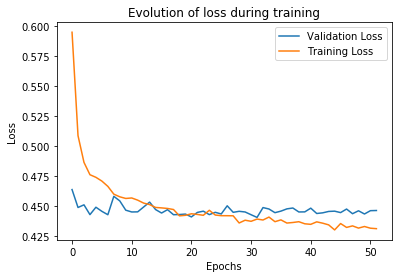

In [157]:
val_loss = plt.plot(model.history.history['val_loss'], label='Validation Loss')
loss = plt.plot(model.history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Evolution of loss during training')
plt.legend()
plt.show()

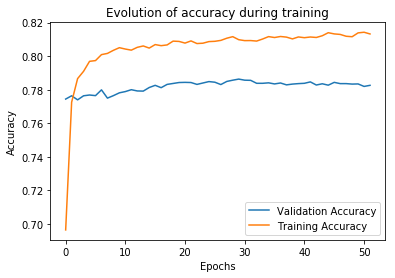

In [158]:
val_acc = plt.plot(model.history.history['val_acc'], label='Validation Accuracy')
acc = plt.plot(model.history.history['acc'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Evolution of accuracy during training')
plt.legend()
plt.show()

In [155]:
model.save('../models/keras_shallow.h5')